In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

In [3]:
import numpy as np
import matplotlib.pyplot as plt

D = 100
N = 2
xdata = np.random.randn(D * N).reshape(D, N).astype(np.float32)

def f(x):
    y = x * x
    return y

tdata = (xdata[:, 1] > f(xdata[:, 0])).astype(np.int32)

In [4]:
C = 2
NN = Chain(l1 = L.Linear(N, C))

In [5]:
def model(x): 
    y = NN.l1(x)
    return y

In [6]:
ydata = model(xdata)
print(ydata)

variable([[ 1.30588388e+00  2.04447091e-01]
          [ 1.42221391e+00  2.23689884e-01]
          [ 2.76172101e-01  1.64780356e-02]
          [-2.87861753e+00 -4.25074130e-01]
          [-1.76143968e+00 -2.15738907e-01]
          [-2.30444264e+00 -3.00293922e-01]
          [ 2.39422202e+00  3.00672919e-01]
          [-6.80605710e-01 -1.49574474e-01]
          [ 2.24831533e+00  2.68343776e-01]
          [ 2.00426078e+00  1.66244000e-01]
          [ 5.79631233e+00  6.34146869e-01]
          [-1.11630630e+00 -1.60173789e-01]
          [ 8.15444529e-01 -3.54830213e-02]
          [ 2.59902263e+00  3.69345963e-01]
          [ 6.95447326e-01  1.48922745e-02]
          [ 1.99537170e+00  2.49876067e-01]
          [ 9.51187909e-01  1.28433630e-01]
          [-5.26259780e-01 -1.43414706e-01]
          [ 4.85389471e-01  1.01627588e-01]
          [-2.63916326e+00 -3.81687462e-01]
          [-2.59103966e+00 -2.76346475e-01]
          [ 9.90602612e-01  7.08092973e-02]
          [ 2.28335810e+00  2.84

In [7]:
acc = F.accuracy(ydata, tdata)
print(acc)

variable(0.65)


In [8]:
optNN = Opt.SGD()
optNN.setup(NN)

In [9]:
loss_series = []
acc_series = []

In [10]:
T = 500
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata, tdata)
    acc = F.accuracy(ydata, tdata)
    loss.backward()
    optNN.update()
    
    loss_series.append(loss.data)
    acc_series.append(acc.data)

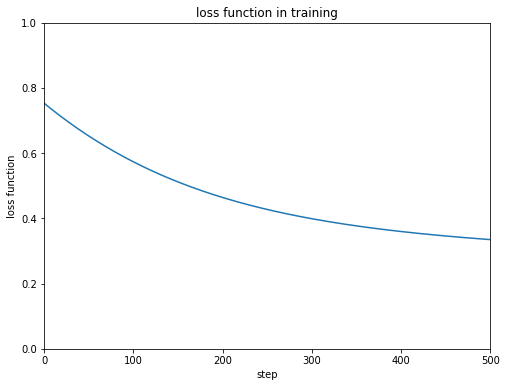

In [11]:
Tall = len(loss_series)
plt.figure(figsize = (8,6))
plt.plot(range(Tall), loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()

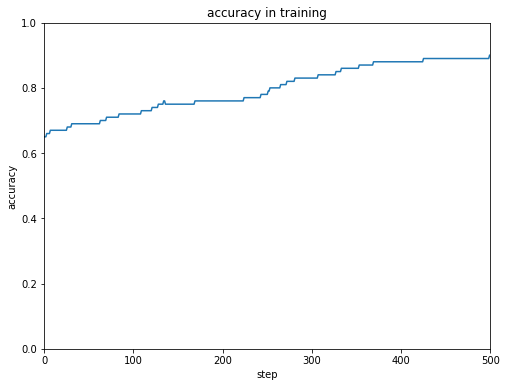

In [12]:
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()

In [13]:
C = 2
NN = Chain(l1 = L.Linear(N, 4), l2 = L.Linear(4, C))

In [14]:
def model(x): 
    h = NN.l1(x)
    h = F.sigmoid(h)
    y = NN.l2(h)
    return y

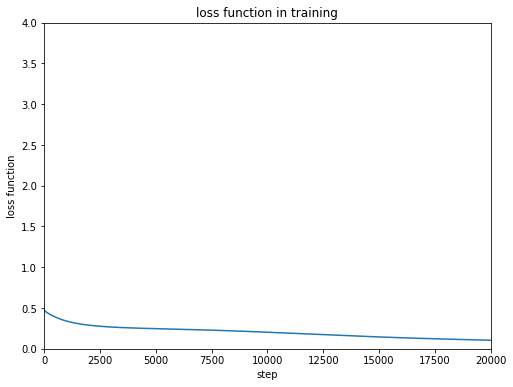

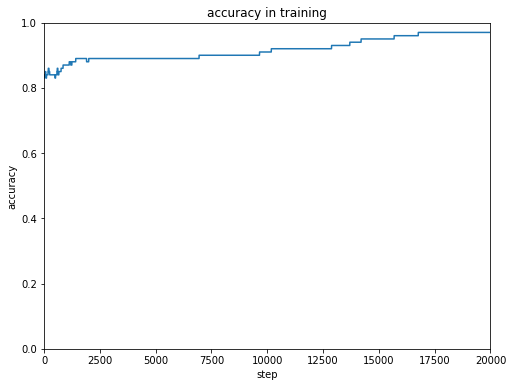

In [15]:
optNN = Opt.SGD()
optNN.setup(NN)

# 学習の記録を残す場所を用意して
loss_series = []
acc_series = []

# 再び結界を張った
T = 20000

for time in range(T): 
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata, tdata)
    acc = F.accuracy(ydata, tdata)
    loss.backward()
    optNN.update()
    
    loss_series.append(loss.data)
    acc_series.append(acc.data)

# 誤差関数の表示
Tall = len(loss_series)
plt.figure(figsize = (8, 6))
plt.plot(range(Tall), loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0, 4])

plt.show()

# 精度の表示をして
plt.figure(figsize = (8, 6))
plt.plot(range(Tall),acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()